
Авторы материала: Юрий Кашницкий (@yorko) и Максим Уваров (@maxis42)

# <center>Домашнее задание № 3 
## <center> Деревья решений для классификации и регрессии

**В этом задании мы построим дерево решений с нуля. Данное задание не является обязательным к выполнению, и больше направлена на ваш персональный интерес к тематике. За выполнение данного задания вы можете получить дополнительные баллы 
Заполните код в клетках (где написано "Ваш код здесь") и ответьте на вопросы в [веб-форме](https://docs.google.com/forms/d/1Hyt4ZBH6T4o-qVHxuzdFQ9p-WaSiCr_ia2EcMxatKsg/edit?usp=sharing).**


In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz

## 1. Простой пример восстановления регрессии с помощью дерева решений

Рассмотрим следующую одномерную задачу восстановления регрессии. Неформально, надо построить функцию $a(x)$, приближающую искомую зависимость $y = f(x)$ в терминах среднеквадратичной ошибки: $min \sum_i {(a(x_i) - f(x_i))}^2$. Подробно мы рассмотрим эту задачу в следующий раз , а пока поговорим о том, как решать эту задачу с помощью дерева решений. Предварительно пройдитесь по ноутбуку в разделе практики по деревьям решений. 

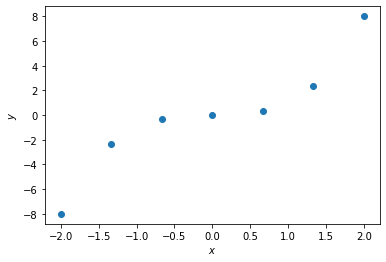

In [2]:
X = np.linspace(-2, 2, 7)
y = X ** 3

plt.scatter(X, y)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$');

Проделаем несколько шагов в построении дерева решений. Исходя из соображений симметрии, выберем пороги для разбиения равными соответственно 0, 1.5 и -1.5. Напомним, что в случае задачи восстановления регрессии листовая вершина выдает среднее значение ответа по всем объектам обучающей выборки, попавшим в эту вершину.

Итак, начнём. Дерево глубины 0 состоит из одного корня, который содержит всю обучающую выборку. Как будут выглядеть предсказания данного дерева для $x \in [-2, 2]$? Постройте соответствующий график. Тут без `sklearn` – разбираемся просто с ручкой, бумажкой и Python, если надо.

0

Произведем первое разбиение выборки по предикату $[x < 0]$. Получим дерево глубины 1 с двумя листьями. Постройте аналогичный график предсказаний для этого дерева.

X: [-2.         -1.33333333 -0.66666667  0.          0.66666667  1.33333333
  2.        ]
y: [-8.         -2.37037037 -0.2962963   0.          0.2962963   2.37037037
  8.        ]
left_prediction: -3.5555555555555554
right_prediction: 2.666666666666666


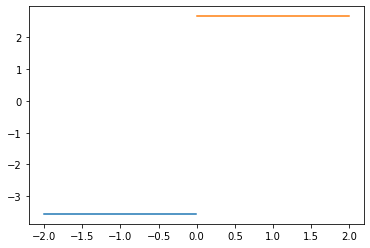

In [3]:
# Ваш код здесь
print("X:", X)
print("y:", y)

left_prediction = np.average(X[:3] ** 3)
right_prediction = np.average(X[3:] ** 3)
print("left_prediction:", left_prediction)
print("right_prediction:", right_prediction)

display_left_X = np.arange(-2, 0, step=1e-2)
display_right_X = np.arange(0, 2, step=1e-2)
plt.plot(display_left_X, [left_prediction for x in display_left_X])
plt.plot(display_right_X, [right_prediction for x in display_right_X])

В алгоритме построения дерева решений признак и значение порога, по которым происходит разбиение выборки, выбираются исходя из некоторого критерия. Для регрессии обычно используется дисперсионный критерий:
$$Q(X, j, t) = D(X) - \dfrac{|X_l|}{|X|} D(X_l) - \dfrac{|X_r|}{|X|} D(X_r),$$
где $X$ – выборка, находящаяся в текущей вершине, $X_l$ и $X_r$ – разбиение выборки $X$ на две части по предикату $[x_j < t]$ (то есть по $j$-ому признаку и порогу $t$), $|X|$, $|X_l|$, $|X_r|$ - размеры соответствующих выборок, а $D(X)$ – дисперсия ответов на выборке $X$:
$$D(X) = \dfrac{1}{|X|} \sum_{x_j \in X}(y_j – \dfrac{1}{|X|}\sum_{x_i \in X}y_i)^2,$$
где $y_i = y(x_i)$ – ответ на объекте $x_i$. При каждом разбиении вершины выбираются признак $j$ и значение порога $t$, максимизирующие значение функционала $Q(X, j, t)$.

В нашем случае признак всего один, поэтому $Q$ зависит только от значения порога $t$ (и ответов выборки в данной вершине). 

Постройте график функции $Q(X, t)$ в корне в зависимости от значения порога $t$ на отрезке $[-1.9, 1.9]$.

In [4]:
def regression_var_criterion(X, y, t):
    X_left = X[X < t]
    X_right = X[X >= t]
    y_left = y[X < t]
    y_right = y[X >= t]
    
    left_part = X_left.shape[0] / X.shape[0]
    right_part = X_right.shape[0] / X.shape[0]

    # The variance is the average of the squared deviations from the mean, i.e., var = mean(abs(x - x.mean())**2).
    criterion_value = np.var(y) - left_part * np.var(y_left) - right_part * np.var(y_right)
    return criterion_value

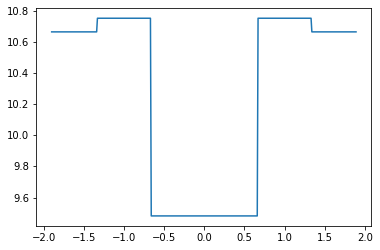

In [5]:
# Ваш код здесь
T = np.arange(-1.9, 1.9, step=1e-2)
plt.plot(T, [regression_var_criterion(X, y, t) for t in T])

**<font color='red'>Вопрос 1.</font> Оптимально ли с точки зрения дисперсионного критерия выбранное нами значение порога $t = 0$?**
- Да
- Нет

No

Теперь произведем разбиение в каждой из листовых вершин. В левой (соответствующей ветви $x < 0$) – по предикату $[x < -1.5]$, а в правой (соответствующей ветви $x \geqslant 0$) – по предикату $[x < 1.5]$. Получится дерево глубины 2 с 7 вершинами и 4 листьями. Постройте график предсказаний этого дерева для $x \in [-2, 2]$.

-1.3333333333333337


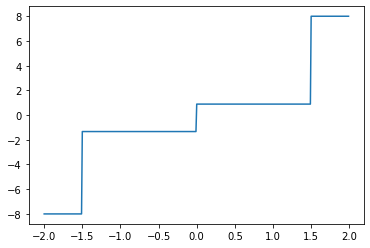

In [6]:
# Ваш код здесь
def prediction_DT_depth2(X, y, new_x):
    if new_x < 0:
        if new_x < -1.5:
            return np.average(y[X < -1.5])
        else:
            return np.average(y[(X >= -1.5) & (X < 0)])
    else:
        if new_x < 1.5:
            return np.average(y[(X >= 0) & (X < 1.5)])
        else:
            return np.average(y[X >= 1.5])
        
print(prediction_DT_depth2(X, y, -1))
new_xs = np.arange(-2, 2, step=1e-2)
plt.plot(new_xs, [prediction_DT_depth2(X, y, new_x) for new_x in new_xs])

**<font color='red'>Вопрос 2.</font> Из какого числа отрезков состоит график (необходимо считать как горизонтальные, так и вертикальные прямые), изображающий предсказания построенного дерева на отрезке [-2, 2]?**
- 5
- 6
- 7
- 8

7

## 2. Построение дерева решений для прогноза сердечно-сосудистых заболеваний
Считаем в `DataFrame` знакомый нам набор данных по сердечно-сосудистым заболеваниям. 

In [35]:
df = pd.read_csv(
    '../../../data/mlbootcamp5_train.csv',
    index_col='id',
    sep=';'
)

In [36]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


Сделайте небольшие преобразования признаков: постройте признак "возраст в годах" (полных лет), а также постройте по 3 бинарных признака на основе `cholesterol` и `gluc`, где они, соответственно, равны 1, 2 или 3. Эта техника называется dummy-кодированием или One Hot Encoding (OHE), удобней всего в данном случае использовать `pandas.get_dummies`. Исходные признаки `cholesterol` и `gluc` после кодирования использовать не нужно.

In [37]:
# Ваш код здесь
df["age"] = df["age"] / 365.25
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,50.357290,2,168,62.0,110,80,1,1,0,0,1,0
1,55.381246,1,156,85.0,140,90,3,1,0,0,1,1
2,51.627652,1,165,64.0,130,70,3,1,0,0,0,1
3,48.249144,2,169,82.0,150,100,1,1,0,0,1,1
4,47.841205,1,156,56.0,100,60,1,1,0,0,0,0


In [38]:
columns_to_one_hot = ["gluc", "cholesterol"]
for column in columns_to_one_hot:
    one_hot = pd.get_dummies(df[column], prefix=column)
    df = df.drop(column, axis=1)
    df = df.join(one_hot)

In [39]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,gluc_1,gluc_2,gluc_3,cholesterol_1,cholesterol_2,cholesterol_3
id,,,,,,,,,,,,,,,,
0,50.357290,2,168,62.0,110,80,0,0,1,0,1,0,0,1,0,0
1,55.381246,1,156,85.0,140,90,0,0,1,1,1,0,0,0,0,1
2,51.627652,1,165,64.0,130,70,0,0,0,1,1,0,0,0,0,1
3,48.249144,2,169,82.0,150,100,0,0,1,1,1,0,0,1,0,0
4,47.841205,1,156,56.0,100,60,0,0,0,0,1,0,0,1,0,0


In [40]:
df_label = df["cardio"]
df = df.drop("cardio", axis=1)
df.head()

,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,gluc_1,gluc_2,gluc_3,cholesterol_1,cholesterol_2,cholesterol_3
id,,,,,,,,,,,,,,,
0,50.357290,2,168,62.0,110,80,0,0,1,1,0,0,1,0,0
1,55.381246,1,156,85.0,140,90,0,0,1,1,0,0,0,0,1
2,51.627652,1,165,64.0,130,70,0,0,0,1,0,0,0,0,1
3,48.249144,2,169,82.0,150,100,0,0,1,1,0,0,1,0,0
4,47.841205,1,156,56.0,100,60,0,0,0,1,0,0,1,0,0


Разбейте выборку на обучающую и отложенную (holdout) части в пропорции 7/3. Для этого используйте метод `sklearn.model_selection.train_test_split`, зафиксируйте у него `random_state`=17.

In [41]:
X_train, X_valid, y_train, y_valid = train_test_split(df, df_label, test_size=0.3, random_state=17) # Ваш код здесь

Обучите на выборке `(X_train, y_train)` дерево решений с ограничением на максимальную глубину в 3. Зафиксируйте у дерева `random_state=17`. Визуализируйте дерево с помошью `sklearn.tree.export_graphviz`, `dot` и `pydot`. Пример дан в [статье](https://habrahabr.ru/company/ods/blog/322534/) под спойлером "Код для отрисовки дерева". Названия файлов писать без кавычек, для того чтобы работало в jupyter notebook. Обратите внимание, что команды в Jupyter notebook, начинающиеся с восклицательного знака – это терминальные команды (которые мы обычно запускаем в терминале/командной строке).

In [42]:
# Ваш код здесь
from sklearn.tree import DecisionTreeClassifier
simple_DTC = DecisionTreeClassifier(max_depth=3, random_state=17)
simple_DTC.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=17, splitter='best')

In [43]:
import graphviz as gv

simple_DTC_dot_path = './simple_DTC.dot'

export_graphviz(
    simple_DTC,
    feature_names=df.columns,
    out_file=simple_DTC_dot_path,
    filled=True
)
simple_DTC_png_path = gv.render('dot', 'png', simple_DTC_dot_path)

**<font color='red'>Вопрос 3.</font> Какие 3 признака задействуются при прогнозе в построенном дереве решений? (то есть эти три признака "можно найти в дереве")**
- weight, height, gluc=3
- smoke, age, gluc=3
- age, weight, chol=3
- age, ap_hi, chol=3

age, ap_hi, chol

Сделайте с помощью обученного дерева прогноз для отложенной выборки `(X_valid, y_valid)`. Посчитайте долю верных ответов (accuracy).

In [44]:
# Ваш код здесь
from sklearn.metrics import accuracy_score
simple_DTC_valid_predictions = simple_DTC.predict(X_valid)
accuracy1 = accuracy_score(y_valid, simple_DTC_valid_predictions)
print("valid_accuracy", accuracy1)

valid_accuracy 0.7212857142857143


Теперь на кросс-валидации по выборке  `(X_train, y_train)`  настройте глубину дерева, чтобы повысить качество модели. Используйте GridSearchCV, 5-кратную кросс-валидацию. Зафиксируйте у дерева `random_state`=17. Перебирайте параметр `max_depth` от 2 до 10. 

In [45]:
from sklearn.model_selection import GridSearchCV, cross_val_score

# tree params for grid search
tree = DecisionTreeClassifier(max_depth=3, random_state=17)
max_depth_values = list(range(2, 11))
tree_params = {
    'max_depth': max_depth_values,
}

tree_grid = GridSearchCV(
    simple_DTC,
    tree_params,
    cv=5,
    n_jobs=-1,
    verbose=True
)

In [46]:
tree_grid.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    2.9s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=3,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=17,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
             pre

Нарисуйте график того, как меняется средняя доля верных ответов на кросс-валидации в зависимости от значения `max_depth`.

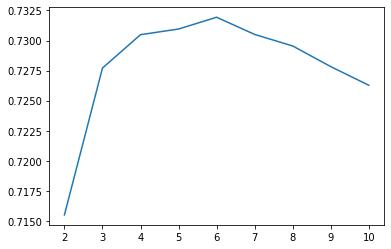

In [47]:
# Ваш код здесь
means = tree_grid.cv_results_['mean_test_score']
plt.plot(max_depth_values, means)

Выведите лучшее значение `max_depth`, то есть такое, при котором среднее значение метрики качества на кросс-валидации максимально. Посчитайте также, какова теперь доля верных ответов на отложенной выборке. Все это можно сделать с помощью обученного экземпляра класса `GridSearchCV`.

In [48]:
# Ваш код здесь
print("best_params:", tree_grid.best_params_)
print("best_score:", tree_grid.best_score_)

best_params: {'max_depth': 6}
best_score: 0.731938775510204


In [49]:
accuracy2 = tree_grid.best_estimator_.score(X_valid, y_valid)
print("valid_accuracy", accuracy2)

valid_accuracy 0.7258571428571429


In [50]:
accuracy_change = (accuracy2 - accuracy1) / accuracy1 * 100
print("accuracy_change", accuracy_change)

accuracy_change 0.633788869082985


**<font color='red'>Вопрос 4.</font> Имеется ли на кривой валидации по максимальной глубине дерева пик `accuracy`, если перебирать `max_depth` от 2 до 10? Повысила ли настройка глубины дерева качество классификации (accuracy) более чем на 1% на отложенной выборке (надо посмотреть на выражение (acc2 - acc1) / acc1 * 100%, где acc1 и acc2 – доли верных ответов на отложенной выборке до и после настройки max_depth соответственно)?**
- да, да
- да, нет
- нет, да
- нет, нет

Yes, No

Обратимся опять (как и в 1 домашке) к картинке, демонстрирующей шкалу SCORE для расчёта риска смерти от сердечно-сосудистого заболевания в ближайшие 10 лет.
<img src='../../../img/SCORE2007.png' width=70%>

Создайте бинарные признаки, примерно соответствующие этой картинке:
- $age \in [45,50), \ldots age \in [60,65) $ (4 признака)
- верхнее артериальное давление: $ap\_hi \in [120,140), ap\_hi \in [140,160), ap\_hi \in [160,180),$ (3 признака)

Если значение возраста или артериального давления не попадает ни в один из интервалов, то все бинарные признаки будут равны нулю. Далее будем строить дерево решений с этим признаками, а также с признаками ``smoke``, ``cholesterol``  и ``gender``. Из признака ``cholesterol`` надо сделать 3 бинарных, соотв-х уникальным значениям признака ( ``cholesterol``=1,  ``cholesterol``=2 и  ``cholesterol``=3), эта техника называется dummy-кодированием или One Hot Encoding (OHE). Признак ``gender`` надо перекодировать: значения 1 и 2 отобразить на 0 и 1. Признак лучше переименовать в ``male`` (0 – женщина, 1 – мужчина). В общем случае кодирование значений делает ``sklearn.preprocessing.LabelEncoder``, но в данном случае легко обойтись и без него.

Итак, дерево решений строится на 12 бинарных признаках (исходные признаки не берем).

Постройте дерево решений с ограничением на максимальную глубину = 3 и обучите его на всей исходной обучающей выборке. Используйте `DecisionTreeClassifier`, на всякий случай зафикисровав `random_state=17`, остальные аргументы (помимо `max_depth` и `random_state`) оставьте по умолчанию. 

**<font color='red'>Вопрос 5.</font> Какой бинарный признак из 12 перечисленных оказался самым важным для обнаружения ССЗ, то есть поместился в вершину построенного дерева решений?**
- Верхнее артериальное давление от 160 до 180 (мм рт.ст.)
- Пол мужской / женский
- Верхнее артериальное давление от 140 до 160 (мм рт.ст.)
- Возраст от 50 до 55 (лет)
- Курит / не курит
- Возраст от 60 до 65 (лет)

In [56]:
# Ваш код здесь
import copy

df_death_risk = copy.deepcopy(df)

df_death_risk['age_45_50'] = np.where((df_death_risk['age'] < 50) & (df_death_risk['age'] >= 45), 1, 0)
df_death_risk['age_50_55'] = np.where((df_death_risk['age'] < 55) & (df_death_risk['age'] >= 50), 1, 0)
df_death_risk['age_55_60'] = np.where((df_death_risk['age'] < 60) & (df_death_risk['age'] >= 55), 1, 0)
df_death_risk['age_60_65'] = np.where((df_death_risk['age'] < 65) & (df_death_risk['age'] >= 60), 1, 0)

df_death_risk['ap_hi_120_140'] = np.where((df_death_risk['ap_hi'] < 140) & (df_death_risk['ap_hi'] >= 120), 1, 0)
df_death_risk['ap_hi_140_160'] = np.where((df_death_risk['ap_hi'] < 160) & (df_death_risk['ap_hi'] >= 140), 1, 0)
df_death_risk['ap_hi_160_180'] = np.where((df_death_risk['ap_hi'] < 180) & (df_death_risk['ap_hi'] >= 160), 1, 0)

df_death_risk['male'] = np.where(df_death_risk['gender'] == 2, 1, 0)

columns_to_save = [
    "male",
    "age_45_50",
    "age_50_55",
    "age_55_60",
    "age_60_65",
    "ap_hi_120_140",
    "ap_hi_140_160",
    "ap_hi_160_180",
    "cholesterol_1",
    "cholesterol_2",
    "cholesterol_3",
    "smoke",
]
for column in df_death_risk.columns:
    if column not in columns_to_save:
        df_death_risk = df_death_risk.drop(column, axis=1)
        
df_death_risk.head()

,smoke,cholesterol_1,cholesterol_2,cholesterol_3,age_45_50,age_50_55,age_55_60,age_60_65,ap_hi_120_140,ap_hi_140_160,ap_hi_160_180,male
id,,,,,,,,,,,,
0,0,1,0,0,0,1,0,0,0,0,0,1
1,0,0,0,1,0,0,1,0,0,1,0,0
2,0,0,0,1,0,1,0,0,1,0,0,0
3,0,1,0,0,1,0,0,0,0,1,0,1
4,0,1,0,0,1,0,0,0,0,0,0,0


In [57]:
from sklearn.tree import DecisionTreeClassifier
death_risk_DTC = DecisionTreeClassifier(max_depth=3, random_state=17)
death_risk_DTC.fit(df_death_risk, df_label)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=17, splitter='best')

In [58]:
death_risk_DTC_dot_path = './death_risk_DTC.dot'

export_graphviz(
    death_risk_DTC,
    feature_names=df_death_risk.columns,
    out_file=death_risk_DTC_dot_path,
    filled=True
)
death_risk_DTC_png_path = gv.render('dot', 'png', death_risk_DTC_dot_path)

most important is ap_hi_140_160